In [1]:
print("hai")


hai


# Machine Learning Classification


In [3]:
# lakukan proses pemanggilan dataset menggunakan pandas
# import pandas terlebih fahulu

import pandas as pd
df = pd.read_csv("dataset.csv")

df


,kill,assist,death,turret,role
0,10,2,3,2,penyerang
1,3,9,5,0,bertahan
2,8,4,2,1,penyerang
3,2,11,6,0,bertahan
4,12,3,2,3,penyerang
5,4,10,7,0,penyerang
6,9,5,2,2,penyerang
7,1,13,6,0,bertahan
8,11,4,3,2,penyerang
9,2,12,5,0,bertahan


In [4]:
# menampilkam data paling atas 
#default head adalah 5
#jika ingin menampilkan 3 baris pertama tingga tulis 3 didalam kurung
df.head()

,kill,assist,death,turret,role
0,10,2,3,2,penyerang
1,3,9,5,0,bertahan
2,8,4,2,1,penyerang
3,2,11,6,0,bertahan
4,12,3,2,3,penyerang


In [6]:
# menampilkandata terbawah
# default tail adalah 5
df.tail(3)


,kill,assist,death,turret,role
7,1,13,6,0,bertahan
8,11,4,3,2,penyerang
9,2,12,5,0,bertahan


In [10]:
#melihat struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   kill    10 non-null     int64 
 1   assist  10 non-null     int64 
 2   death   10 non-null     int64 
 3   turret  10 non-null     int64 
 4   role    10 non-null     object
dtypes: int64(4), object(1)
memory usage: 532.0+ bytes


In [9]:
#menampilkan informasi statistika
df.describe()

,kill,assist,death,turret
count,10.000000,10.000000,10.000000,10.000000
mean,6.200000,7.300000,4.100000,1.000000
std,4.211096,4.110961,1.911951,1.154701
min,1.000000,2.000000,2.000000,0.000000
25%,2.250000,4.000000,2.250000,0.000000
50%,6.000000,7.000000,4.000000,0.500000
75%,9.750000,10.750000,5.750000,2.000000
max,12.000000,13.000000,7.000000,3.000000


In [12]:
#menampilakan semua baris dalam satu kolom role
df['role']

0    penyerang
1     bertahan
2    penyerang
3     bertahan
4    penyerang
5    penyerang
6    penyerang
7     bertahan
8    penyerang
9     bertahan
Name: role, dtype: object

In [13]:
# menampilkan jumlah maisng masing data di kolom role
df['role'].value_counts()

role
penyerang    6
bertahan     3
 bertahan    1
Name: count, dtype: int64

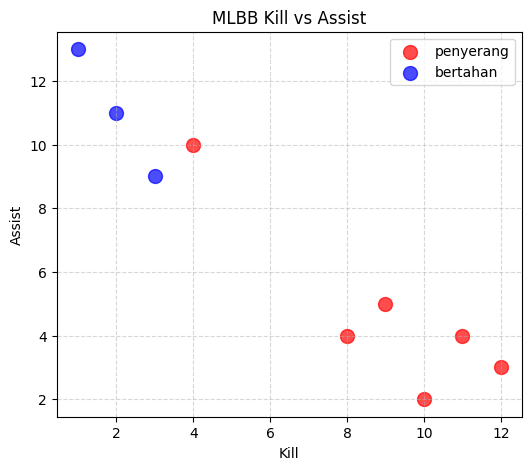

In [19]:
# visualisasi dta menggunakan matplotlib

import matplotlib.pyplot as plt

penyerang = df[df["role"]=="penyerang"]
bertahan = df[df["role"]=="bertahan"]

plt.figure(figsize=(6,5))
plt.scatter(penyerang["kill"],penyerang["assist"],color="red",s=100,alpha=0.7,label="penyerang")
plt.scatter(bertahan["kill"],bertahan["assist"],color="blue",s=100,alpha=0.7,label="bertahan")
plt.xlabel("Kill")
plt.ylabel("Assist")
plt.title("MLBB Kill vs Assist")
plt.legend()
plt.grid(True,linestyle="--",alpha=0.5)
plt.show()

In [22]:
#membuat model machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df[["kill","assist","death","turret"]]
y = df["role"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))

#yg benr 1 tapi punyaku 0.5

Accuracy : 0.5


In [25]:
data_baru = pd.DataFrame([[1,0,9,0]],
                columns=["kill","assist","death","turret"])
model.predict(data_baru)

array(['penyerang'], dtype=object)

In [29]:
data_lain = pd.DataFrame([[1,1,4,5]],
                         columns=["kill","assist","death","turret"])
model.predict(data_lain)[0]

'penyerang'

In [30]:
#menyimpan model machine laaerning
# panggil library joblib
import joblib

#simpan model hasil latihan dengna nama "model_mlbb.joblib"
joblib.dump(model,"model_mlbb.joblib")

['model_mlbb.joblib']

In [ ]:
import joblib 

model_tersimpan = joblib.load("model_mlbb.joblib")
model_lain = pd.DataFrame([[4,4,2,2]], columns=["kill","assist","death","turret"])
#blm slese
model_tersimpan.predict